In [1]:
import os
import pandas as pd
import markdown

import obsidiantools.api as otools
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# READ FROM OBSIDIAN: 

from pathlib import Path

p = Path('./../')

vault = otools.Vault(p).connect()

G = vault.graph

c:\Users\Alberto-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


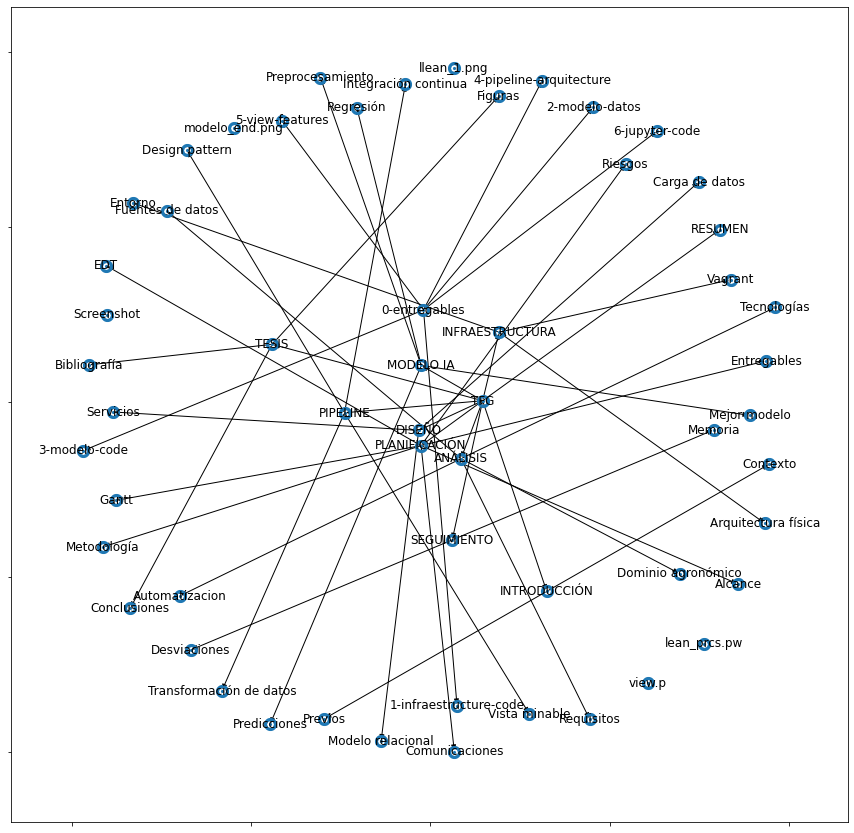

In [3]:
# CREATE GRAPH:

fig, ax = plt.subplots(figsize=(15,15))

nx.draw(G,  with_labels=True, 
            node_size=10, 
            alpha=1, 
            linewidths=10,
            pos=nx.spring_layout(G),
            cmap=plt.get_cmap('jet'),
            ax=ax)

limits=plt.axis('on') # turns on axis

ax.tick_params(left=True, bottom=True)

plt.draw()

In [4]:
import markdown

In [5]:
def process_note(md_file):

    

    pass

In [6]:
# transform mermaid diagrams by hand

# import re

# def mermaid_process1(text):

#     #result = re.search('```mermaid(.*)```', text)

#     result = re.findall('```mermaid(?s:.*?)```', text, re.M)

#     for i in range(len(result)):

#         sub_text = result[i][len('```mermaid'):-3]

#         text = re.sub('```mermaid(?s:.*?)```', '<div class="mermaid">'+ sub_text + '</div>', text, 1)

#     return text

In [7]:
# RECURSIVE:

# import re

# def mermaid_process(text):

#     result = re.findall('```mermaid(?s:.*?)```', text, re.M)

#     if len(result) <= 0:

#         return text

#     sub_text = result[0][len('```mermaid'):-3]

#     text = re.sub('```mermaid(?s:.*?)```', '<div class="mermaid">'+ sub_text + '</div>', text, 1)

#     return mermaid_process(text)

In [8]:
gen_merm_count = 0

In [9]:
import os.path

current_directory = os.getcwd()

parent_directory = os.path.split(current_directory)[0] # Repeat as needed

# parent_directory = current_directory

print(parent_directory)

h:\UR\TFG\txt_mem_clean


In [10]:
import subprocess

# yarn add mermaid.cli
# ./node_modules/.bin/mmdc -h

def mmd_to_img(text, dir):

    # create file and overwirte for each iteration:
    # transform to img:
    # out_img_idx = 0

    # for root_dir, cur_dir, files in os.walk(dir):
    #     out_img_idx += len(files)

    global gen_merm_count

    global parent_directory

    print(gen_merm_count)

    out_name = "output_{a}.png".format(a=str(gen_merm_count))

    img_path = os.path.join(dir, out_name)
    inp_file = os.path.join(dir, "input.mmd")

    with open(inp_file, mode='w', encoding='UTF-8', errors='strict', buffering=1) as file:
        # Write the content to the file
        file.write(text)

    # relative dirs:
    relative_inp = os.path.relpath(inp_file, os.getcwd())
    relative_out = os.path.relpath(img_path, os.getcwd())

    print(str(relative_inp))

    # falta nombre y direcciones correctas; pero está;

    print("mmdc", "--input", str(relative_inp), "-o", str(relative_out))

    #os.popen(" ".join(["mmdc", "--input", str(relative_inp), "-o", str(relative_out) ]))

    subprocess.run ( [ "ls", "-la" ], 
                    stdin =subprocess.PIPE,
                    stdout=subprocess.PIPE,
                    stderr=subprocess.PIPE,
                    universal_newlines=True,
                    shell=True )

    subprocess.run ( [ "mmdc", "--input", str(relative_inp), "-o", str(relative_out) ], 
                    stdin =subprocess.PIPE,
                    stdout=subprocess.PIPE,
                    stderr=subprocess.PIPE,
                    universal_newlines=True,
                    shell=True )

    # si pero la ruta relativa a dónde voy: get full str path:

    gen_merm_count += 1

    res = "![]({aa})".format(aa=str(os.path.join("mermaid", out_name)))

    return repr(res)

In [11]:
import re

def mermaid_process_3(text):

    """ transforms any mermaid diagrams to images in png format"""
    
    global parent_directory

    result = re.findall('```mermaid(?s:.*?)```', text, re.M)

    if len(result) <= 0:

        return text

    sub_text = result[0][len('```mermaid'):-3]

    print(sub_text)

    # transform to img:
    # current_directory = os.getcwd()
    # parent_directory = current_directory
    # parent_directory = os.path.split(current_directory)[0] 

    mermaid_dir = os.path.join(parent_directory, "mermaid")

    text = re.sub('```mermaid(?s:.*?)```', mmd_to_img(sub_text, mermaid_dir) , text, 1)

    return mermaid_process_3(text)

In [12]:
def headers_process(text):

    text = re.sub("<h\d", "<B", text)
    text = re.sub("<\/h\d>", "</B>", text)

    return text

In [13]:
def export_note_to_html(text):
    
    """including rendering mermaid graphics"""

    from markdown.extensions.tables import TableExtension

    text = mermaid_process_3(text)

    html = markdown.markdown(
        text.encode('utf-8').decode('latin-1'), 
        extensions=[
            'codehilite',
            'fenced_code',
            'tables',
            'markdown_captions',
            'attr_list', # optional
        ],
        #output_format="latuni"
        )

    from ftfy import fix_encoding

    html = fix_encoding(html)

    html = headers_process(html)

    return html

In [14]:
# busqueda por nombre recursiva de los ficheros necesarios:

def find_rec(name, path):

    for root, dirs, files in os.walk(path):

        if name in files:
            
            return os.path.join(root, name)

In [15]:
# descendant func:

sorted(list(nx.descendants(G, 'PLANIFICACIÓN')))

['Alcance',
 'Comunicaciones',
 'EDT',
 'Entregables',
 'Gantt',
 'Metodología',
 'Riesgos']

## INDEXING THE NAMES

In [16]:
# get subgraph at node with certain depth:
# necesitamos definir un método recursivo para obtener subgrafos con una cierta profundidad:

def neigh(G, node, depth):

    """ given starting node, recursively find neighbours until desired depth is reached """

    node_list = []

    if depth==0:
        node_list.append(node)
    else:
        for neighbor in G.neighbors(node):
            node_list.append(node)
            node_list += neigh(G, neighbor, depth-1)

    return list(set(node_list))

In [17]:
def parse_index_link(start, numb):

    """ parse html to index link """

    link = '<a href="#{0}">{1} {2}</a>'.format(start.replace(" ", "_"), numb, start)

    return "<li>" + link +  "</li>"

In [18]:
def recursive_indexing(G, start='TFG', numb='1'):
    
    # if start is not 'TFG':

    #     numb = numb + '.1'

    # la cabecera se cuenta como el cero.
    numb = numb + '.0'

    neigh = list(G.neighbors(start))

    # caso base:

    if (len(neigh) == 0):

        # cuando estoy en la última nota no hago el display del cero.

        return parse_index_link(start, numb[:-2])

    # esto si, aunque necesito un <ul> global para el primer caso.

    comp = parse_index_link(start, numb)

    comp = comp + "<ul>"

    for con in neigh:

        # get subgraph at current node to process the note:

        # G_r = neigh(G, con, 1)

        # necesito mirar si el grafo está conectado ¿?
        # puede que si no lo haga -> no consiga parar cuando sea necesario
        # considerar el caso base:

        numb = numb[:-1] + str(int(numb[-1])+1)

        comp = comp + recursive_indexing(G, con, numb)

    comp = comp + "</ul>" 

    return comp

In [19]:
indexing = "<ul>" + recursive_indexing(G) + "</ul>"

In [20]:
indexing

'<ul><li><a href="#TFG">1.0 TFG</a></li><ul><li><a href="#RESUMEN">1.1 RESUMEN</a></li><li><a href="#INTRODUCCIÓN">1.2.0 INTRODUCCIÓN</a></li><ul><li><a href="#Contexto">1.2.1 Contexto</a></li><li><a href="#Previos">1.2.2 Previos</a></li></ul><li><a href="#PLANIFICACIÓN">1.3.0 PLANIFICACIÓN</a></li><ul><li><a href="#Alcance">1.3.1 Alcance</a></li><li><a href="#Metodología">1.3.2 Metodología</a></li><li><a href="#EDT">1.3.3 EDT</a></li><li><a href="#Entregables">1.3.4 Entregables</a></li><li><a href="#Gantt">1.3.5 Gantt</a></li><li><a href="#Comunicaciones">1.3.6 Comunicaciones</a></li><li><a href="#Riesgos">1.3.7 Riesgos</a></li></ul><li><a href="#ANÁLISIS">1.4.0 ANÁLISIS</a></li><ul><li><a href="#Dominio_agronómico">1.4.1 Dominio agronómico</a></li><li><a href="#Fuentes_de_datos">1.4.2 Fuentes de datos</a></li><li><a href="#Automatizacion">1.4.3 Automatizacion</a></li><li><a href="#Tecnologías">1.4.4 Tecnologías</a></li><li><a href="#Requisitos">1.4.5 Requisitos</a></li></ul><li><a hr

In [21]:

f = open("index.html", "w")
f.write(indexing)
f.close()

# bien he avanzado hasta aquí:

In [22]:
# IMPORTANT -> what to do with note links
# 1 - DELETE
# 2 - TRANSFORM TO HTML -> LINK

def note_decorate(start, ident):

    rec_path = find_rec(start + '.md', parent_directory)

    print(rec_path)
    
    f_text = open(rec_path, "r", encoding='utf-8').read()

    # start section to be able to link index:
    html = "<div id=" + start.replace(" ", "_") +">"

    # dejarlo con otro tipo de título y algo de style:

    # es el número de caracteres que tiene

    h_i = sum((c.isdigit()) for c in ident)

    title = "<h{0}>{1}</h{2}>".format(h_i, ident + ' ' + start, h_i)

    # check for link note:

    if ('-- LINK_NOTE --' in f_text):

        # tiene que contener al menos el título

        # puedo poner el page break aquí:

        page_break = '<p style="page-break-after: always;">&nbsp;</p>'

        return page_break + html + title

    html = html + title + export_note_to_html(f_text)

    html = html + "</div>"

    return html

In [23]:
# replace [[]]

import re

def replace_brackets(note_text):

    """ function to replace [[]] """

    # python regular exp:
    
    try :

        marker1 = '[['
        marker2 = ']]'

        regexPattern = marker1 + '(.+?)' + marker2

        str_found = re.search(regexPattern, note_text).group(1)

    except AttributeError:

        str_found = 'Nothing found between two markers'

    print(str_found)

In [24]:
#nuevo algoritmo para la creación recursiva de la memoria:

def rec_note_prcs(G, start='TFG', ident='1'):

    ident = ident + '.0'

    neigh = list(G.neighbors(start))

    # print(neigh)

    # caso base:
    # pero no solo vale si es la última nota -> tengo que renderizar todas
    # también las que dan paso a los enlaces, sino no tiene sentido.

    if (len(neigh) == 0):

        return note_decorate(start,ident[:-2])

    # CURRENT NOTE:

    html = note_decorate(start,ident)

    end_doc = html

    for con in neigh:

        ident = ident[:-1] + str(int(ident[-1])+1)
        
        end_doc = end_doc + rec_note_prcs(G, con, ident)

    return end_doc

In [25]:
end_doc = rec_note_prcs(G)

h:\UR\TFG\txt_mem_clean\TFG.md
h:\UR\TFG\txt_mem_clean\RESUMEN.md
h:\UR\TFG\txt_mem_clean\1-intro\INTRODUCCIÓN.md
h:\UR\TFG\txt_mem_clean\1-intro\Contexto.md
h:\UR\TFG\txt_mem_clean\1-intro\Previos.md
h:\UR\TFG\txt_mem_clean\2-plan\PLANIFICACIÓN.md
h:\UR\TFG\txt_mem_clean\2-plan\Alcance.md
h:\UR\TFG\txt_mem_clean\2-plan\Metodología.md
h:\UR\TFG\txt_mem_clean\2-plan\EDT.md
h:\UR\TFG\txt_mem_clean\2-plan\Entregables.md
h:\UR\TFG\txt_mem_clean\2-plan\Gantt.md

gantt
    title Planificación
    dateFormat  DD-MM
    axisFormat  %d
    
	section ANALISIS
    ANALISIS: 01-01, 10d
	
	section INFRAESTRUCTURA
    ARQUITECTURA: 10-01, 50d
    VAGRANT: 10-01, 10d
    ENTORNO: 10-01, 10d
    
	section DATOS
    RELACIONES BD: 10-01, 20d
    REDISEÑO: crit, 10-01, 20d
    
	section PIPELINE
    BLOQUES:  30-01, 10d
    SCRIPT: 05-02, 5d
    VISTA: 05-02, 5d
    
    section MODELO
    LOAD: 10-02, 5d
    VIEW: 11-02, 5d
	REGRESSION: 12-02, 10d
    BEST_MODEL: crit, 15-02, 10d

	section MEMORIA
	MEM

h:\UR\TFG\txt_mem_clean\2-plan\Comunicaciones.md
h:\UR\TFG\txt_mem_clean\2-plan\Riesgos.md
h:\UR\TFG\txt_mem_clean\3-análisis\ANÁLISIS.md
h:\UR\TFG\txt_mem_clean\3-análisis\Dominio agronómico.md
h:\UR\TFG\txt_mem_clean\3-análisis\Fuentes de datos.md
h:\UR\TFG\txt_mem_clean\3-análisis\Automatizacion.md


graph LR;
    infraestructura-->diseño_relacional;
    diseño_relacional-->pipeline_datos;
    pipeline_datos-->vista_minable;
    vista_minable-->modelo_producción;

1
..\mermaid\input.mmd
mmdc --input ..\mermaid\input.mmd -o ..\mermaid\output_1.png
h:\UR\TFG\txt_mem_clean\3-análisis\Tecnologías.md
h:\UR\TFG\txt_mem_clean\3-análisis\Requisitos.md
h:\UR\TFG\txt_mem_clean\4-infraestructura\INFRAESTRUCTURA.md
h:\UR\TFG\txt_mem_clean\4-infraestructura\Arquitectura física.md
h:\UR\TFG\txt_mem_clean\4-infraestructura\Vagrant.md
h:\UR\TFG\txt_mem_clean\4-infraestructura\Entorno.md
h:\UR\TFG\txt_mem_clean\5-diseño\DISEÑO.md
h:\UR\TFG\txt_mem_clean\5-diseño\Carga de datos.md
h:\UR\TFG\txt_mem_c

In [26]:
# html doc create:

template = """

<!DOCTYPE html>

<html>

    <head>
        <meta charset="UTF-8">
        <title>TFG | Pipeline de Datos</title>

        <link rel="stylesheet" href="body.css">
        <link rel="stylesheet" href="style.css">
        <link rel="stylesheet" href="codehilite.css">
        <link rel="stylesheet" media="print" href="print.css" />
        
    </head> 

    <body>

        <div class="content">

            {0}

            {1}

        <div>

    </body>

</html>

"""

In [27]:
# no lo voy a necesitar:

In [28]:
# include html mermaid rendering engine:

end_doc_1 = template.format( indexing, end_doc)

In [29]:
from bs4 import BeautifulSoup

# add domain 

# soup = BeautifulSoup(end_doc_1)

# for img in soup.findAll('img'):

#     img['src'] = 'https://raw.githubusercontent.com/alesteba/tfg/main/'+img['src']

# html_str = str(soup)

# no me hace falta aquí:

In [30]:
# end_doc to external html:

p = os.path.join(parent_directory, '_k.pcs.zen', 'publish', 'index.html')

f = open(p, "w", encoding="utf-8")
f.write( end_doc_1 )
f.close()

# falta código para darle un minimo de estilo.

In [31]:
#copy figures to publish:

import shutil

copy_fold = os.path.join(parent_directory, 'figures')

dst_fold =  os.path.join(parent_directory, '_k.pcs.zen', 'publish', 'figures')

if os.path.exists(dst_fold) and os.path.isdir(dst_fold):
    # shutil remove in case detected:
    shutil.rmtree(dst_fold)

shutil.copytree(copy_fold, dst_fold)

'h:\\UR\\TFG\\txt_mem_clean\\_k.pcs.zen\\publish\\figures'

In [32]:
import shutil

copy_fold = os.path.join(parent_directory, 'mermaid')

dst_fold =  os.path.join(parent_directory, '_k.pcs.zen', 'publish', 'mermaid')

if os.path.exists(dst_fold) and os.path.isdir(dst_fold):
    # shutil remove in case detected:
    shutil.rmtree(dst_fold)

shutil.copytree(copy_fold, dst_fold)

'h:\\UR\\TFG\\txt_mem_clean\\_k.pcs.zen\\publish\\mermaid'

In [33]:
# modify all imgg src to handle the whole url path:

# index figures and diagrams: (estaría muy bien:)